## 1.0 Imports

In [2]:
import pandas as pd
import seaborn as sns
import inflection
import sweetviz as sv

from matplotlib import pyplot as plt
from IPython.display import HTML
from datetime import datetime

### Helper Functions

In [3]:
def jupyter_settings():
   
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

In [32]:
# supress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Loading Data

In [4]:
df_raw = pd.read_csv('../data/raw/df_ready.csv')
df_raw = df_raw.drop('Unnamed: 0', axis=1)

## 2.0 Data Descripition

In [5]:
df1 = df_raw.copy()

### Rename Columns

In [6]:
cols_old = ['Date_imp', 'Date_imp_d', 'Cluster', 'Category_name', 'name', 'price',
       'disc_price', 'merchant', 'condition', 'Disc_percentage', 'isSale',
       'Imp_count', 'brand', 'p_description', 'currency', 'dateAdded',
       'dateSeen', 'dateUpdated', 'imageURLs', 'manufacturer', 'shipping',
       'sourceURLs', 'weight', 'Date_imp_d.1', 'Day_n', 'month', 'month_n',
       'day', 'Week_Number', 'Zscore_1', 'price_std']
snakecase = lambda x: inflection.underscore( x )
cols_new = list( map( snakecase, cols_old ) )

# Rename
df1.columns = cols_new

### Columns Selection

In [7]:
df1 = df1[['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']]

### Data Dimensions, Dtypes & NaN

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date_imp         23151 non-null  object 
 1   category_name    23151 non-null  object 
 2   name             23151 non-null  object 
 3   price            23151 non-null  float64
 4   disc_price       23151 non-null  float64
 5   merchant         23151 non-null  object 
 6   disc_percentage  23151 non-null  float64
 7   is_sale          23151 non-null  object 
 8   imp_count        23151 non-null  int64  
 9   brand            23151 non-null  object 
 10  p_description    23151 non-null  object 
 11  date_added       23151 non-null  object 
 12  date_seen        23151 non-null  object 
 13  date_updated     23151 non-null  object 
 14  manufacturer     12512 non-null  object 
 15  day_n            23151 non-null  object 
 16  month            23151 non-null  int64  
 17  month_n     

### Change astype

In [9]:
df1.loc[:, 'date_imp'] = pd.to_datetime( df1.loc[:, 'date_imp'] )

### Descriptive Statistical

### Numerical

                                             |          | [  0%]   00:00 -> (? left)

/home/natan/.pyenv/versions/3.11.5/envs/envprice/lib/python3.11/site-packages/sweetviz/series_analyzer.py:12: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  value_counts_with_nan = series.value_counts(dropna=False)



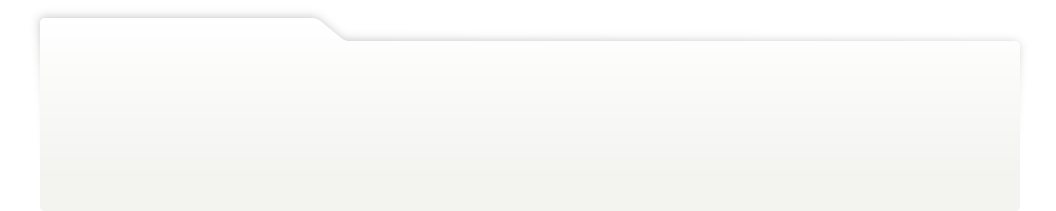
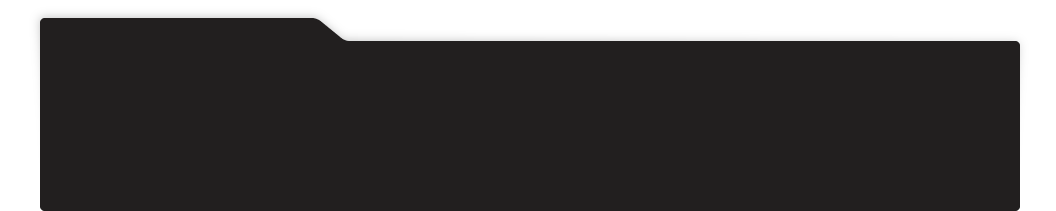
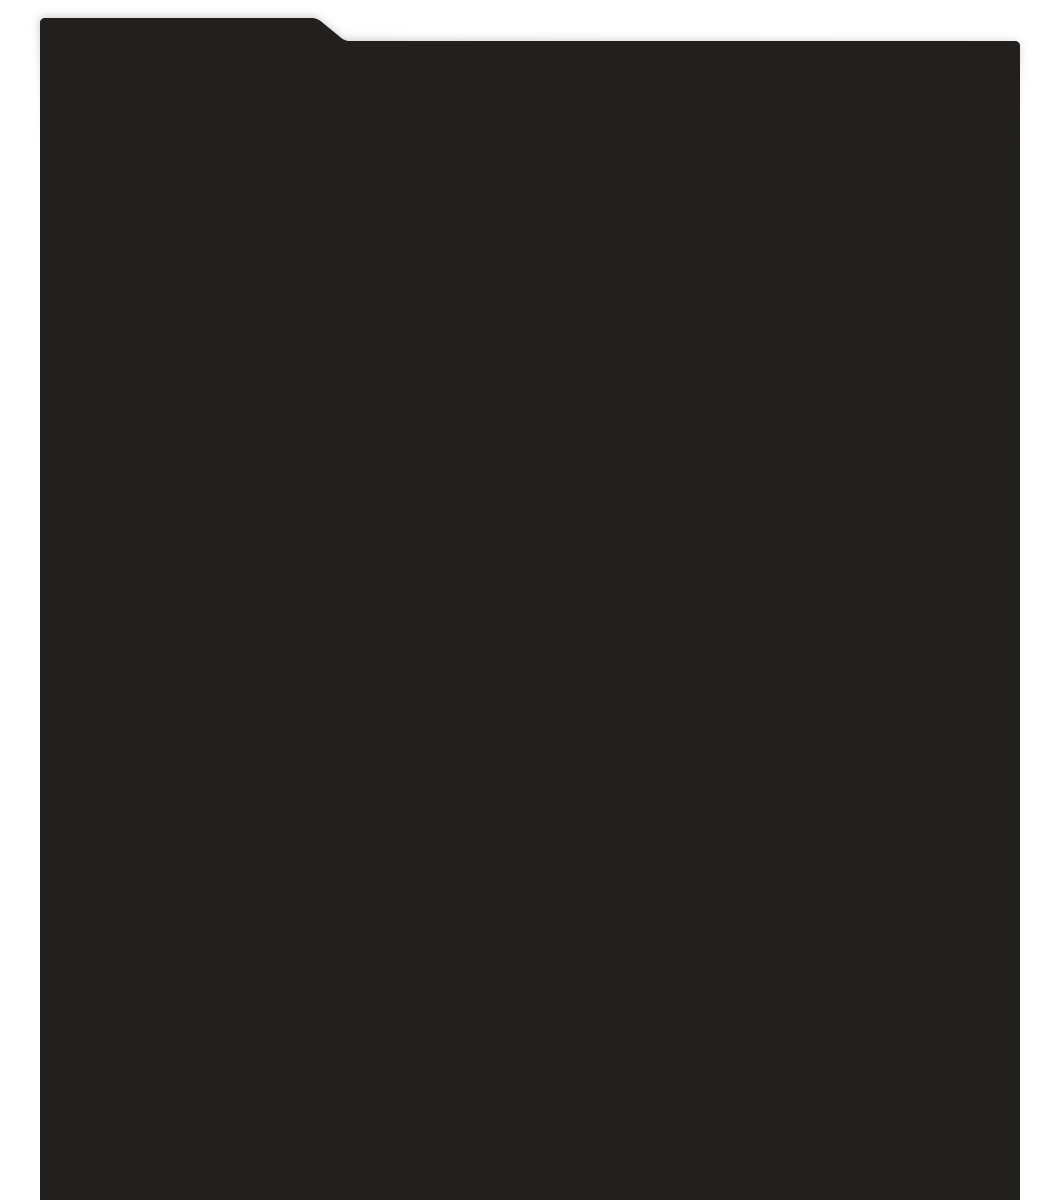
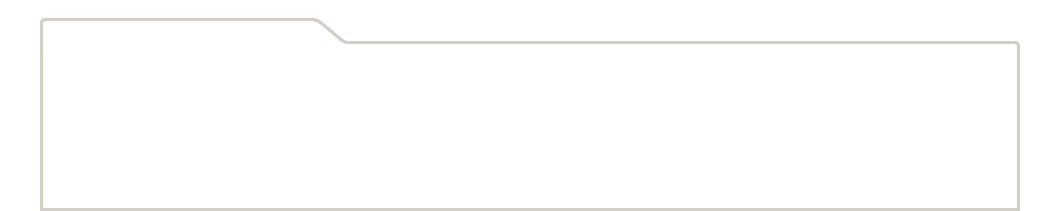
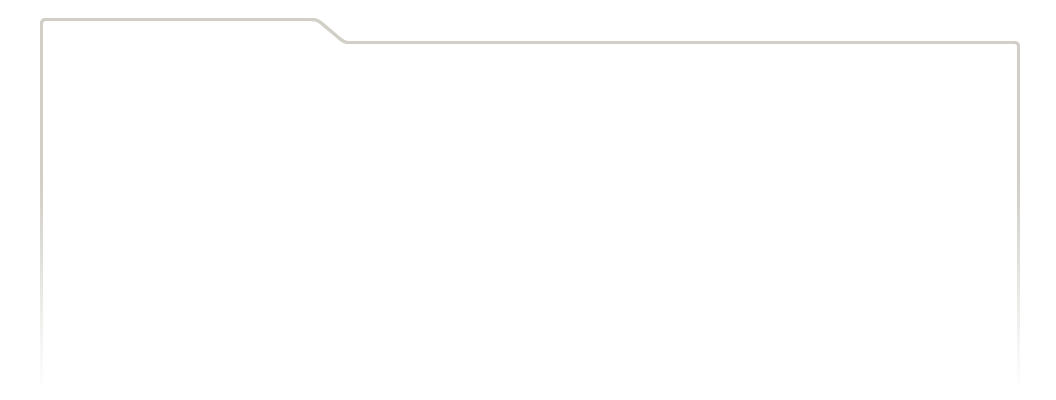
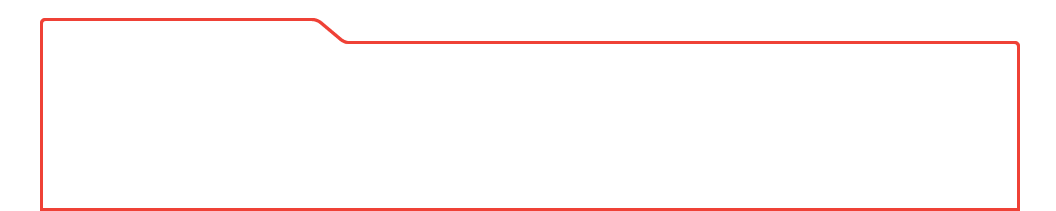
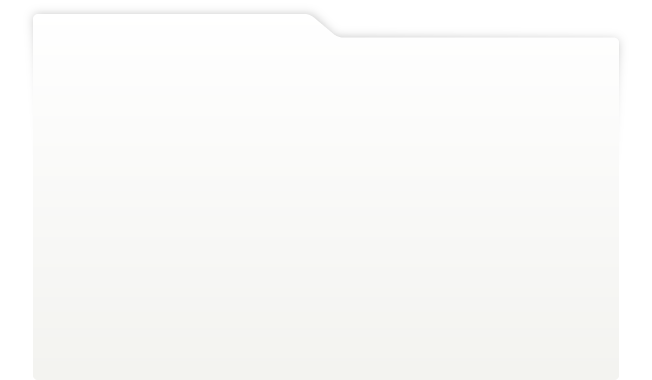
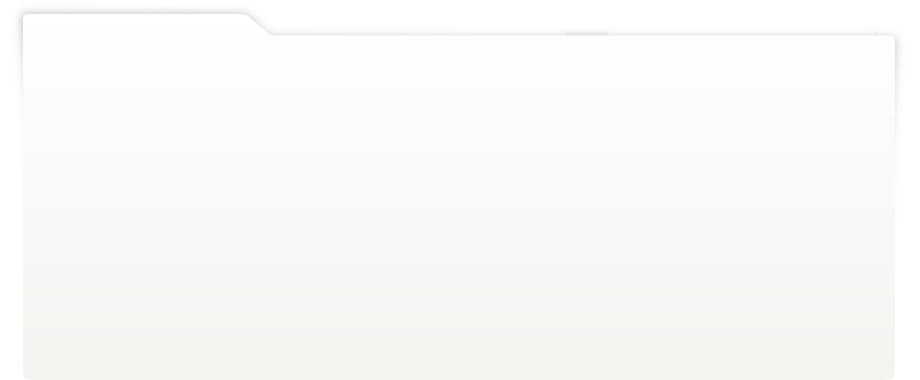
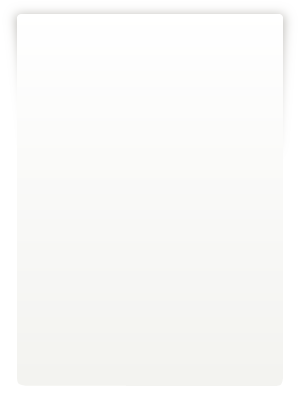
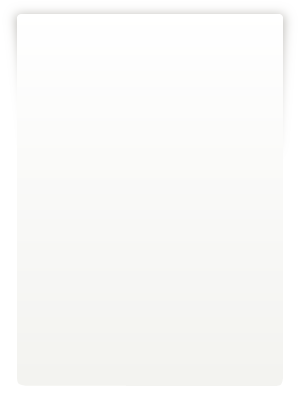
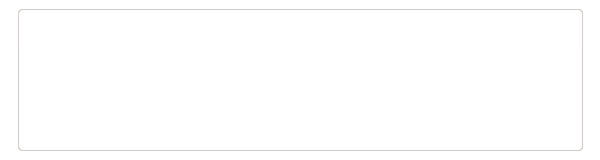
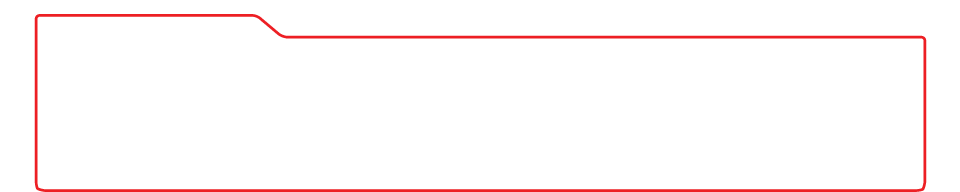
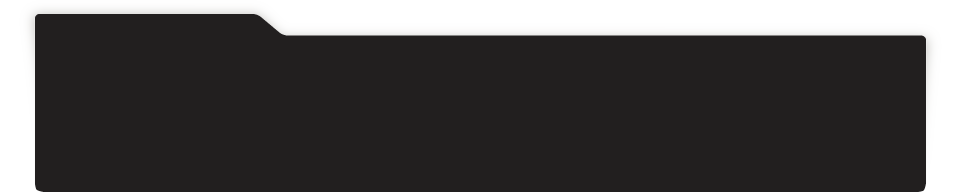
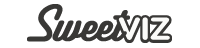
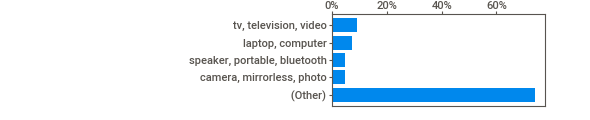
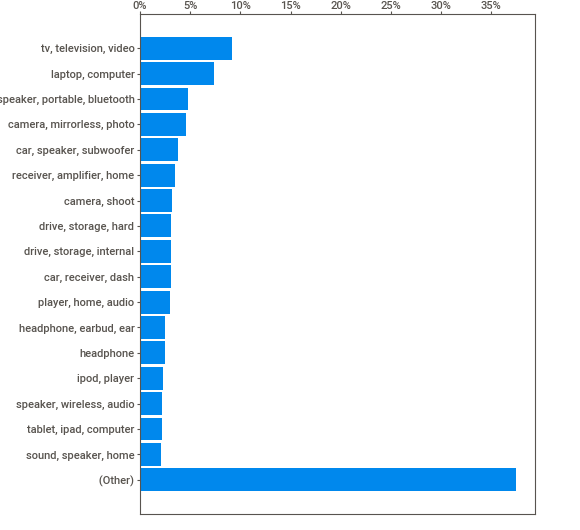
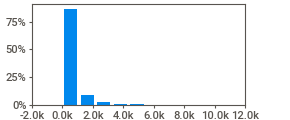
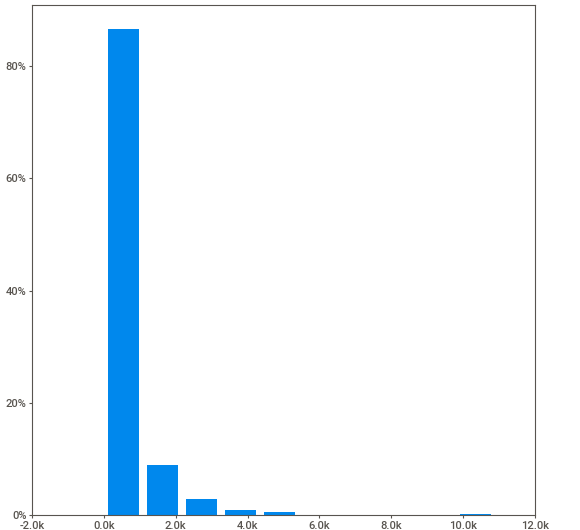
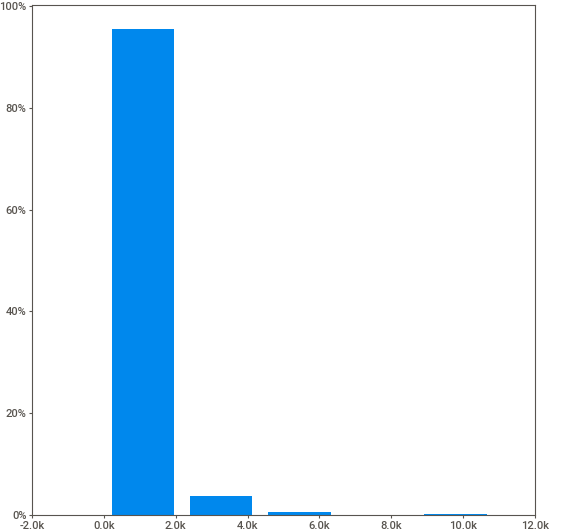
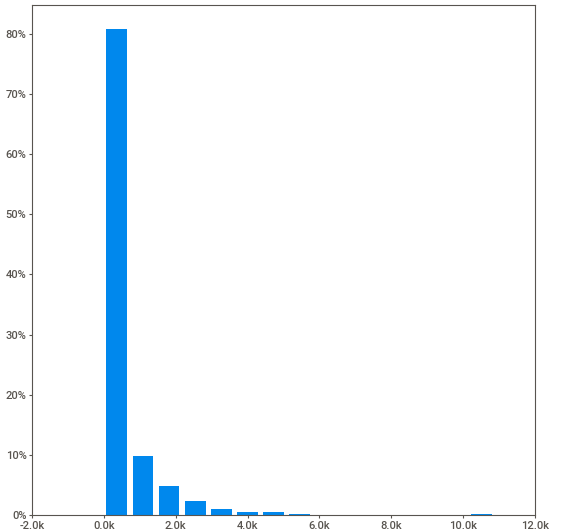
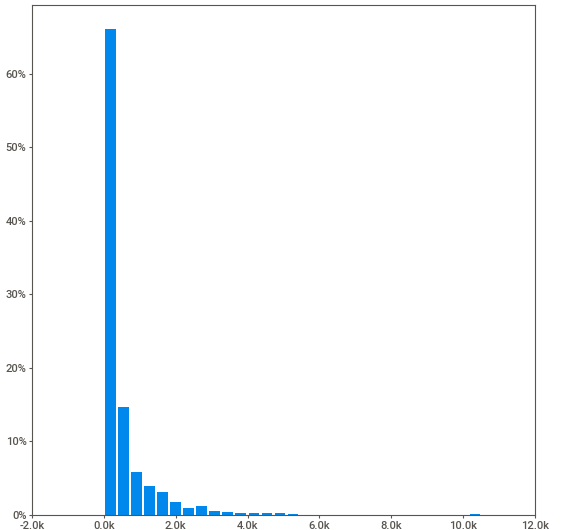
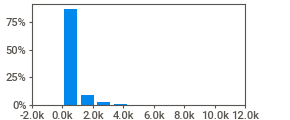
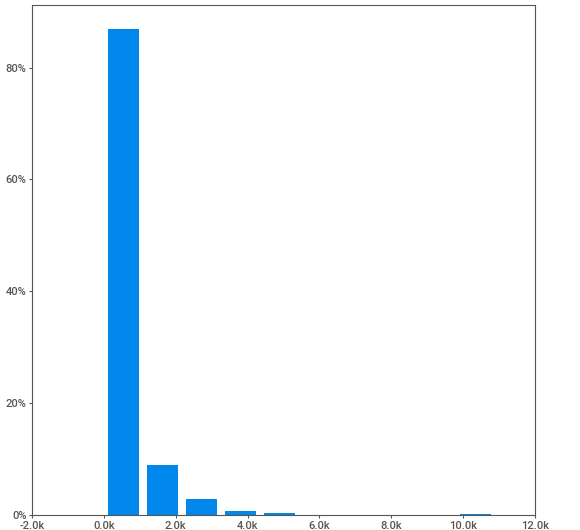
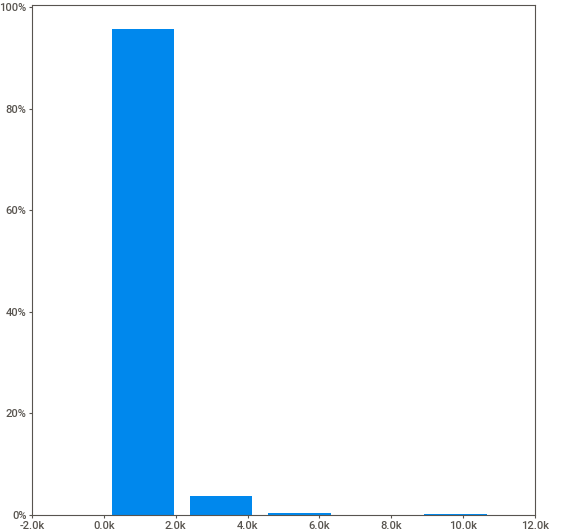
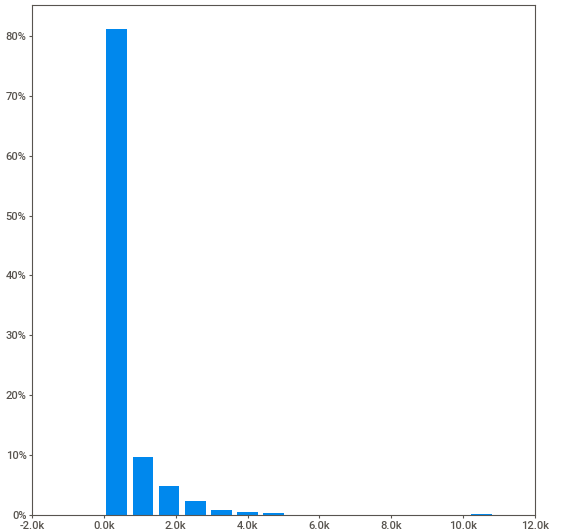
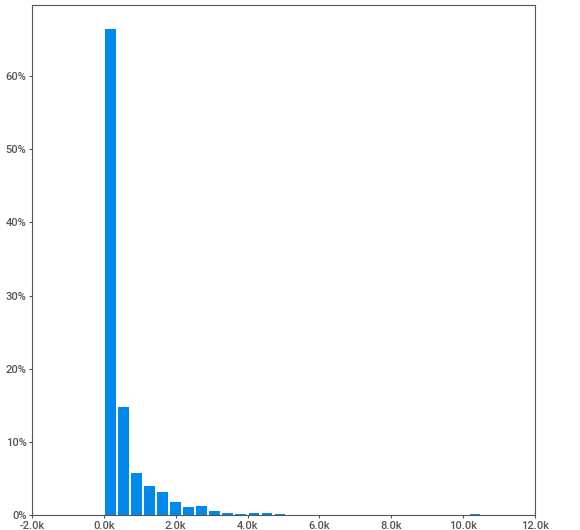
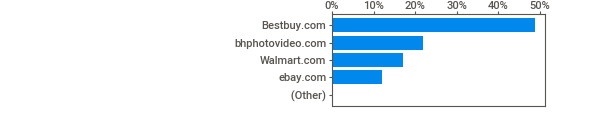
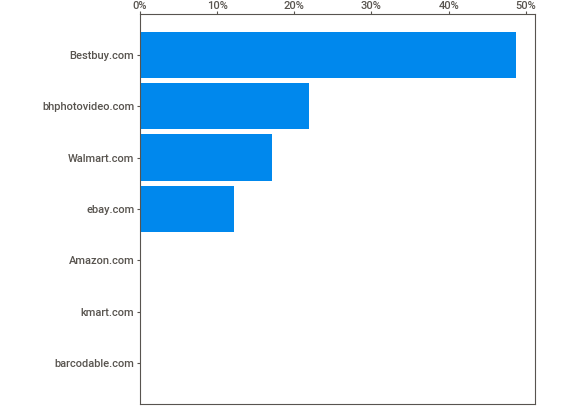
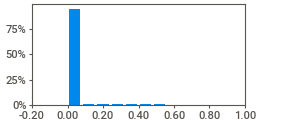
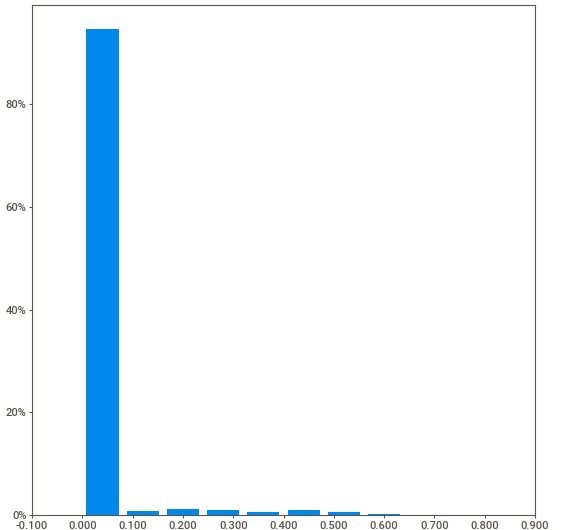
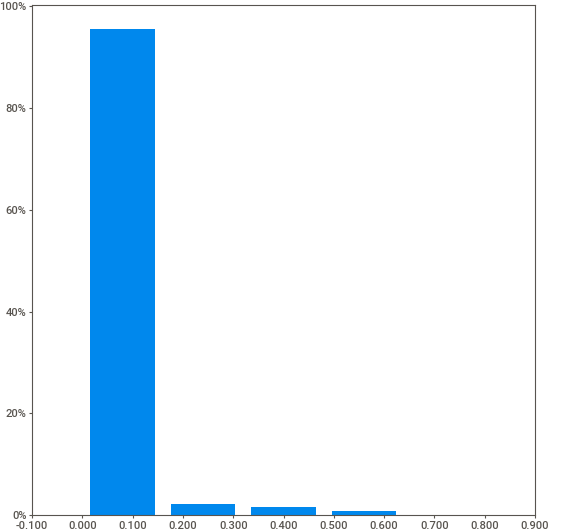
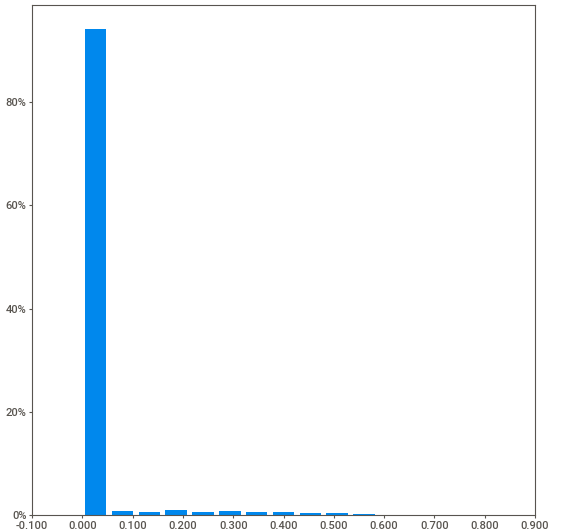
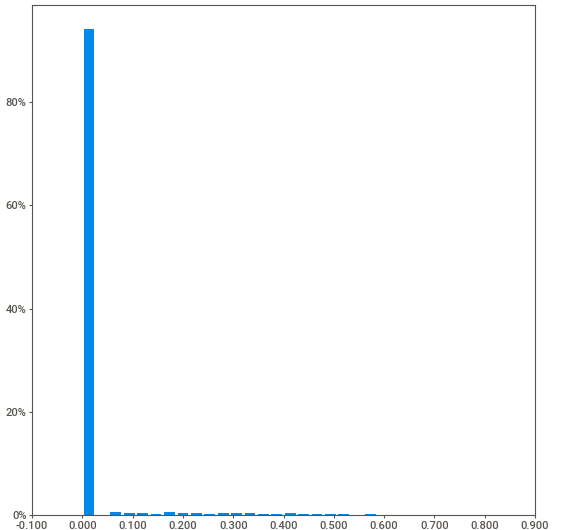
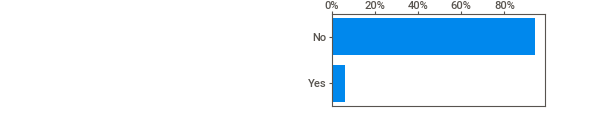
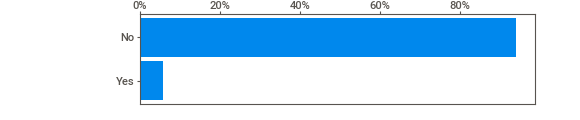
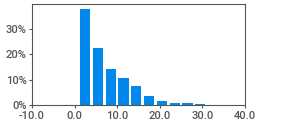
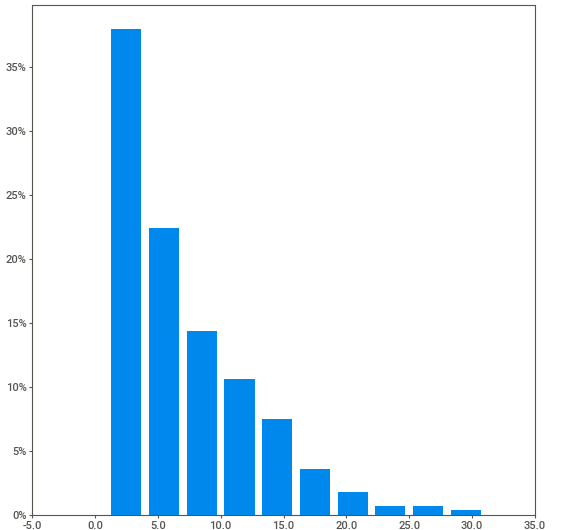
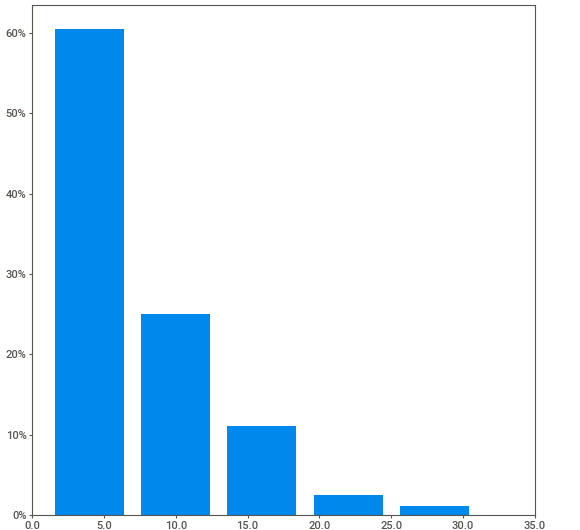
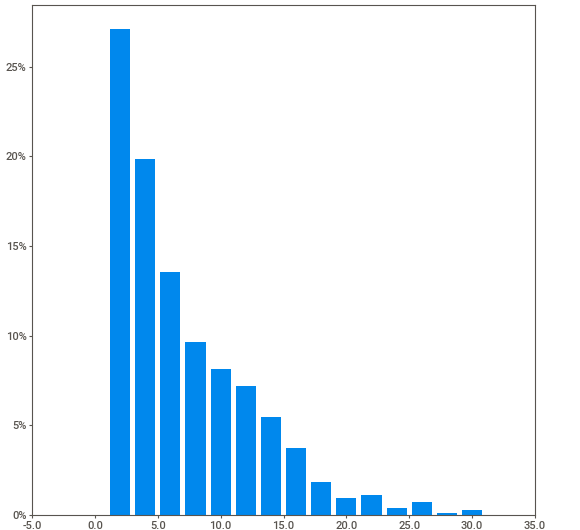
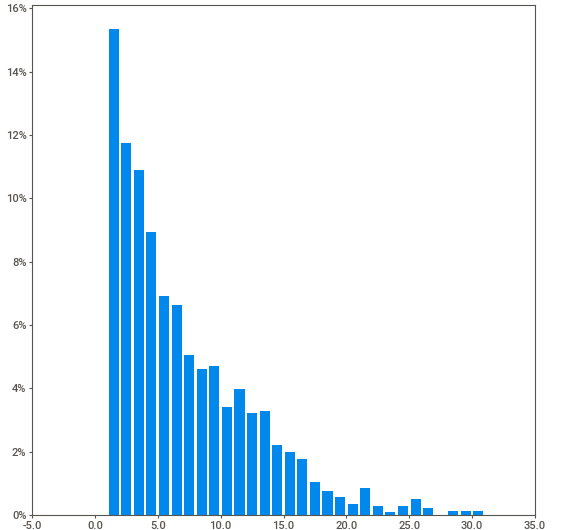
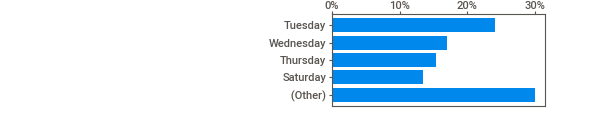
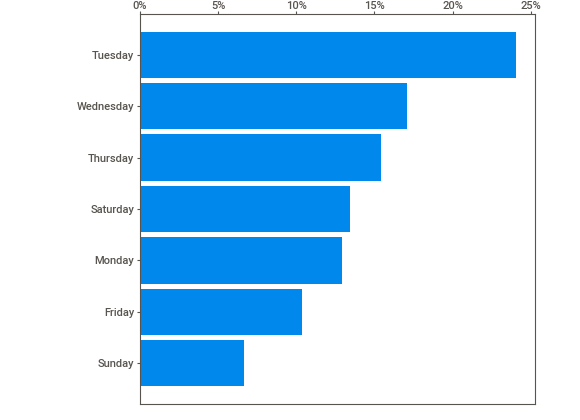
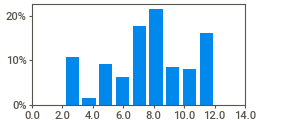
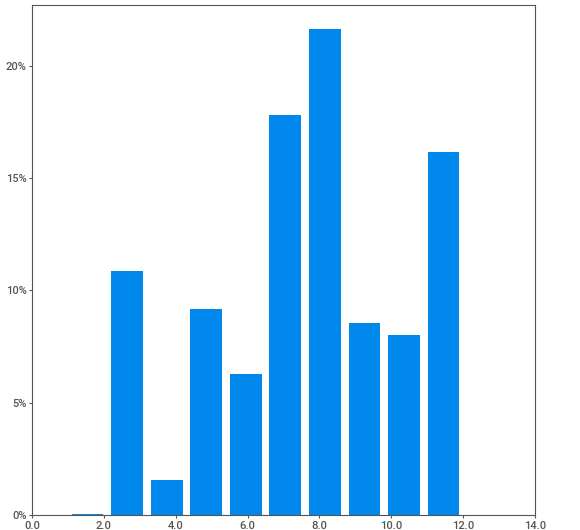
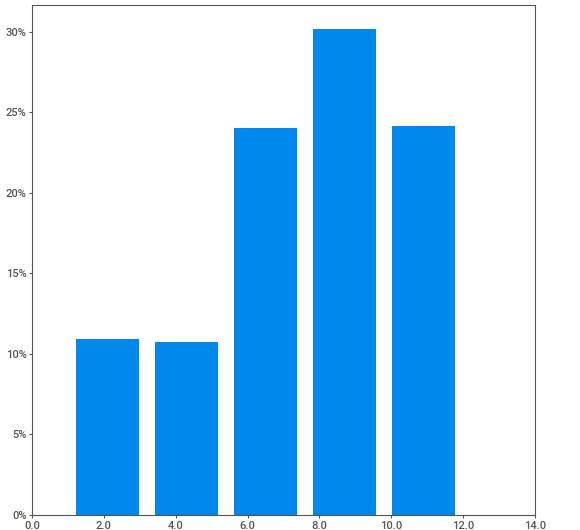
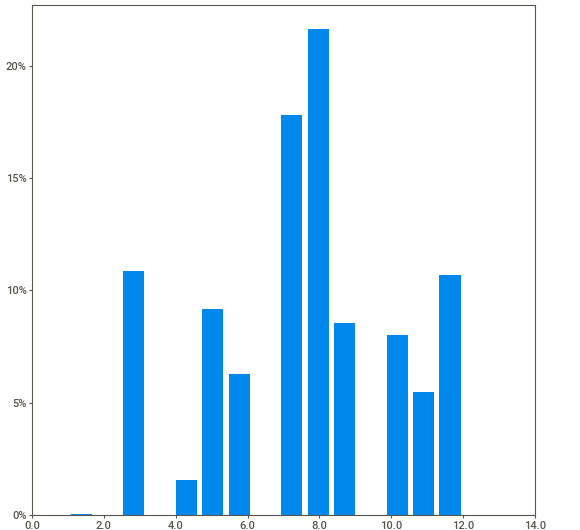
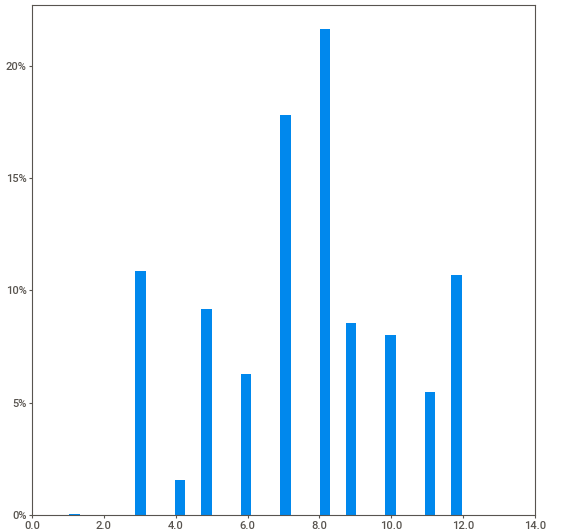
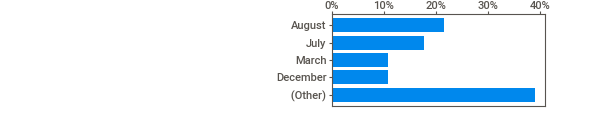
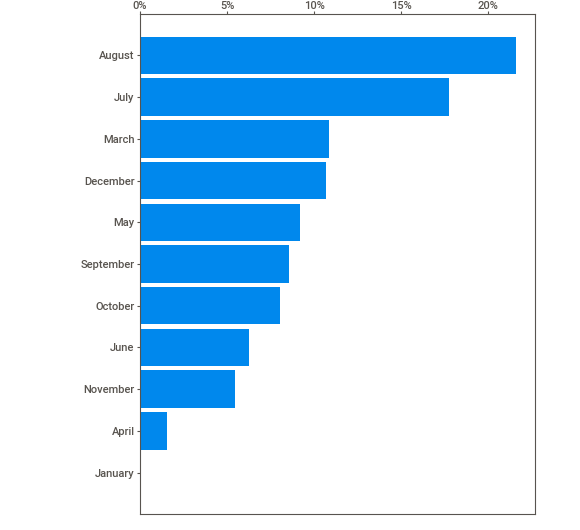
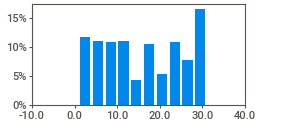
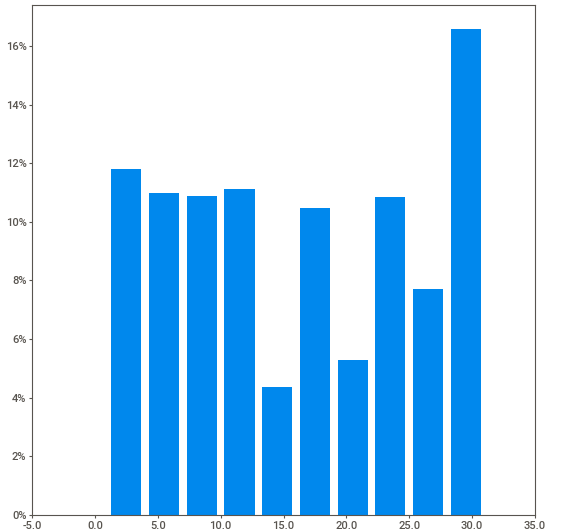
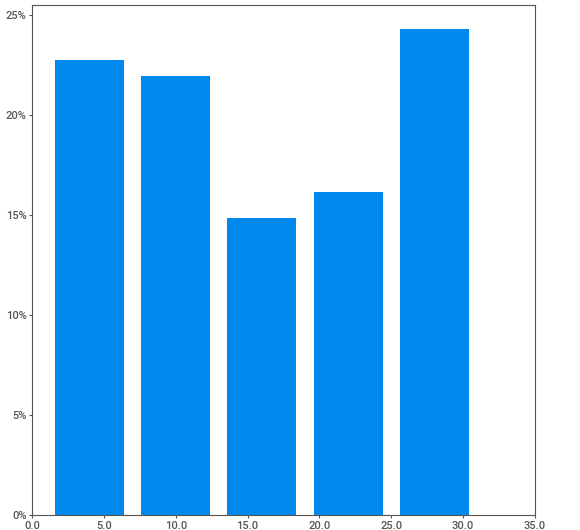
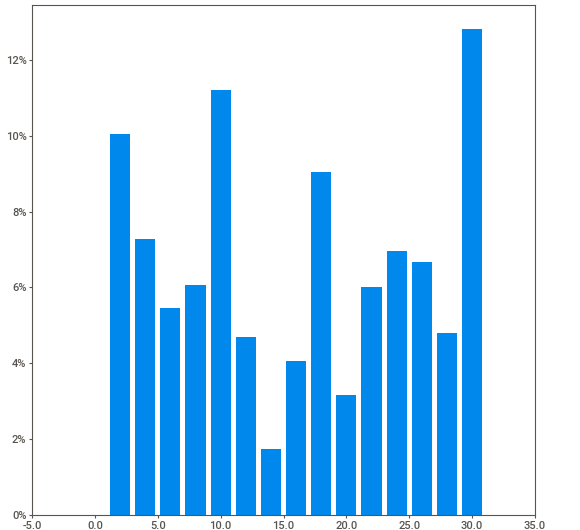
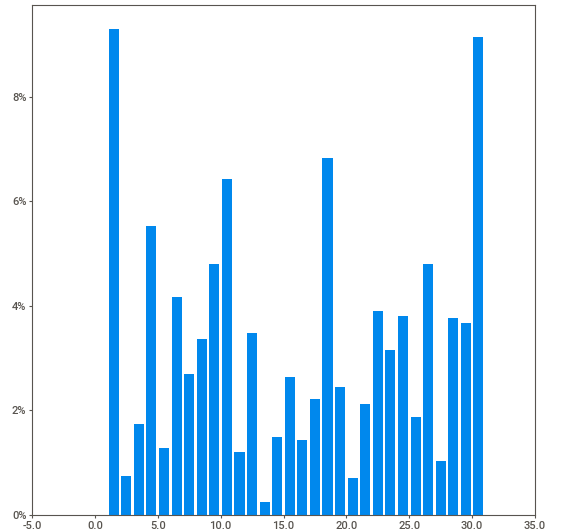
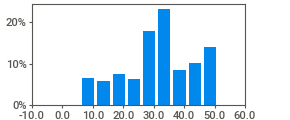
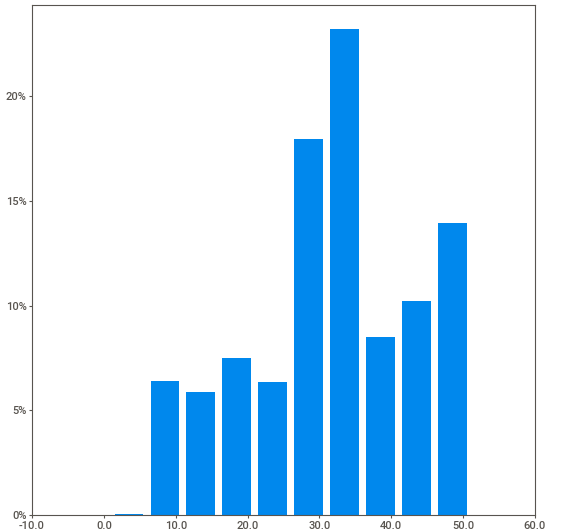
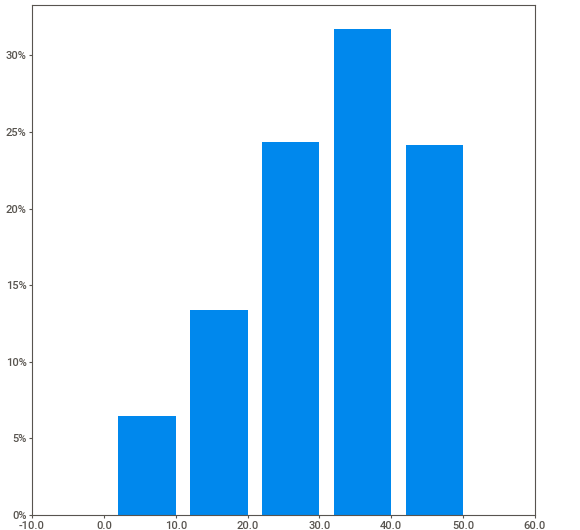
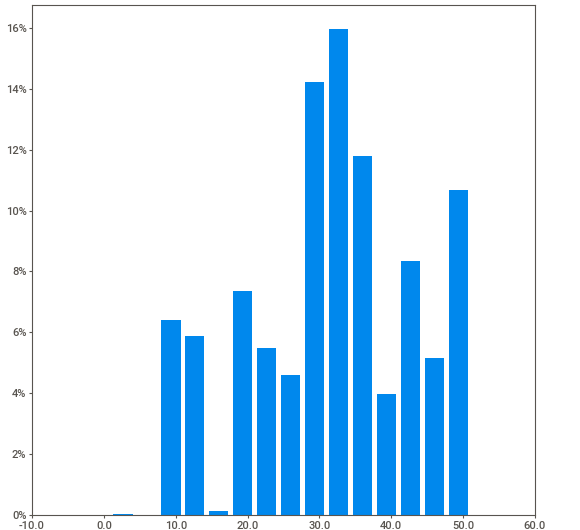
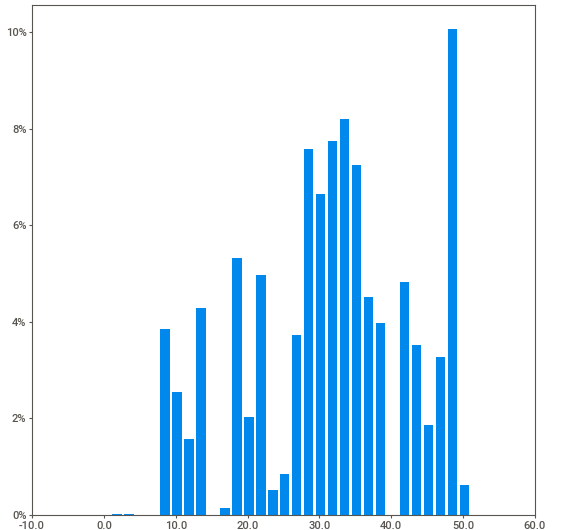
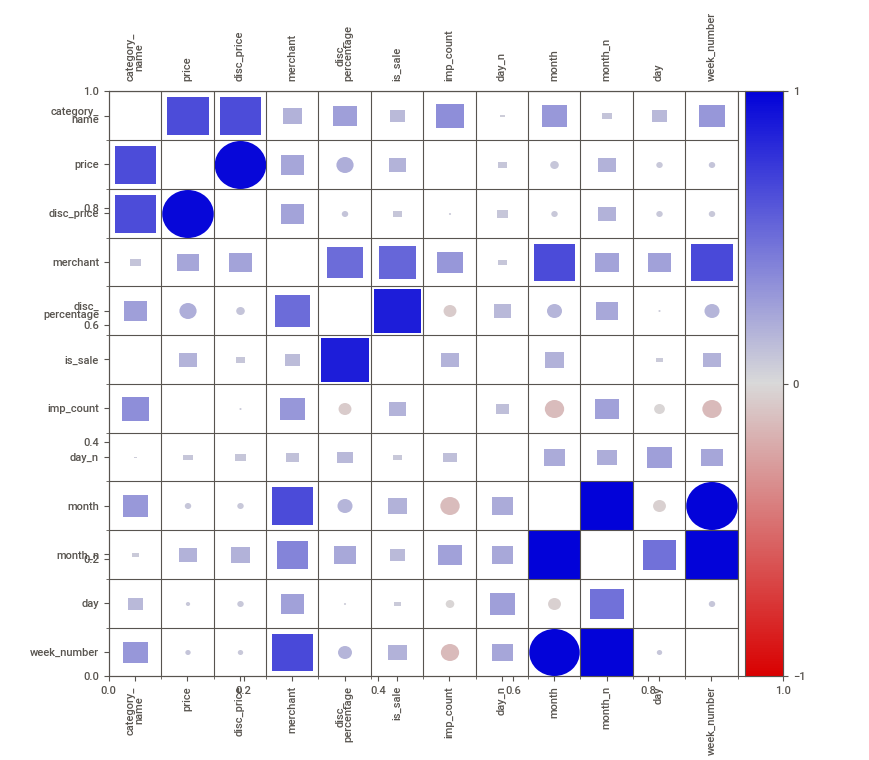
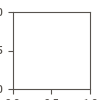

In [12]:
report = sv.analyze( df1 )
report.show_notebook()

## 3.0 Exploratory Data Analysis

In [10]:
df2 = df1.copy()

### Categoria com mais vendas no geral


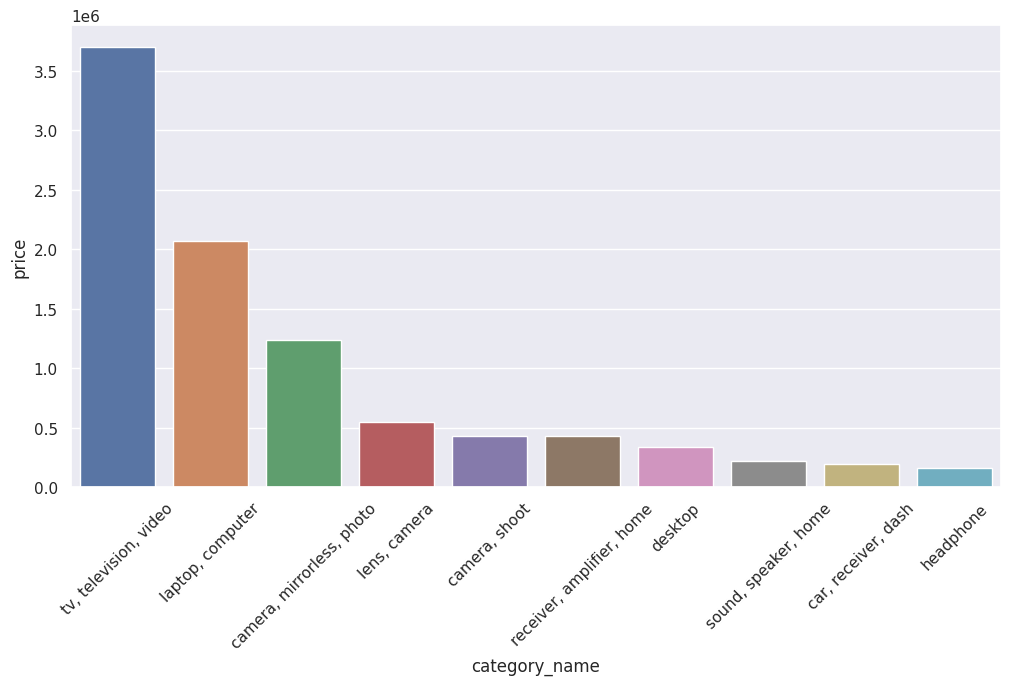

In [33]:
by_category = df2[['price', 'category_name']].groupby('category_name').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_category.head(10), x='category_name', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

### Merchant que mais vende

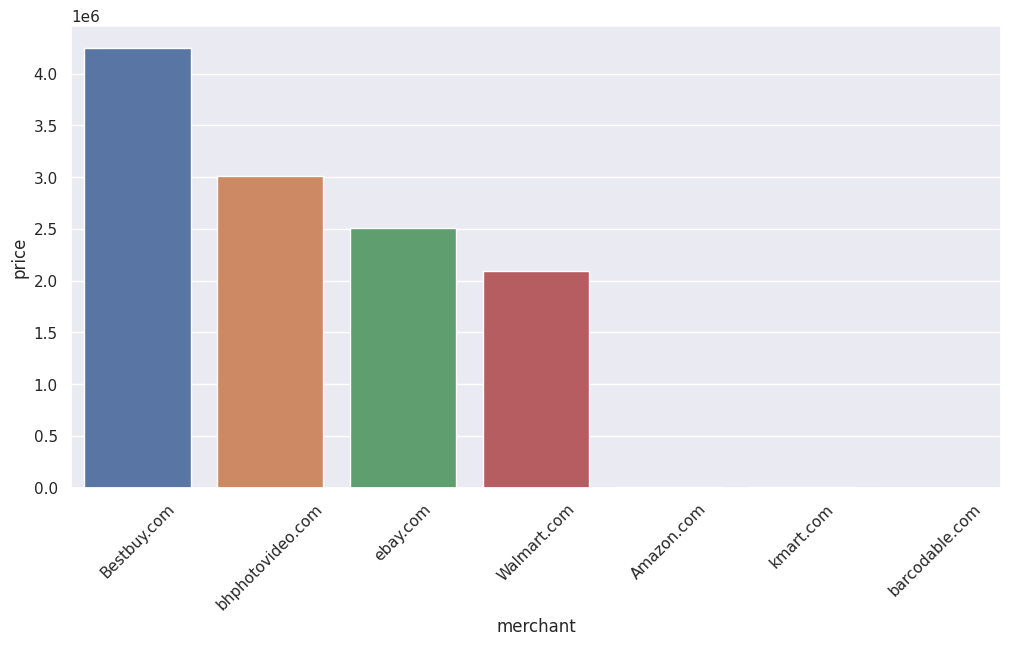

In [34]:
by_merchant = df2[['price', 'merchant']].groupby('merchant').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_merchant.head(10), x='merchant', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

### brand que mais vende

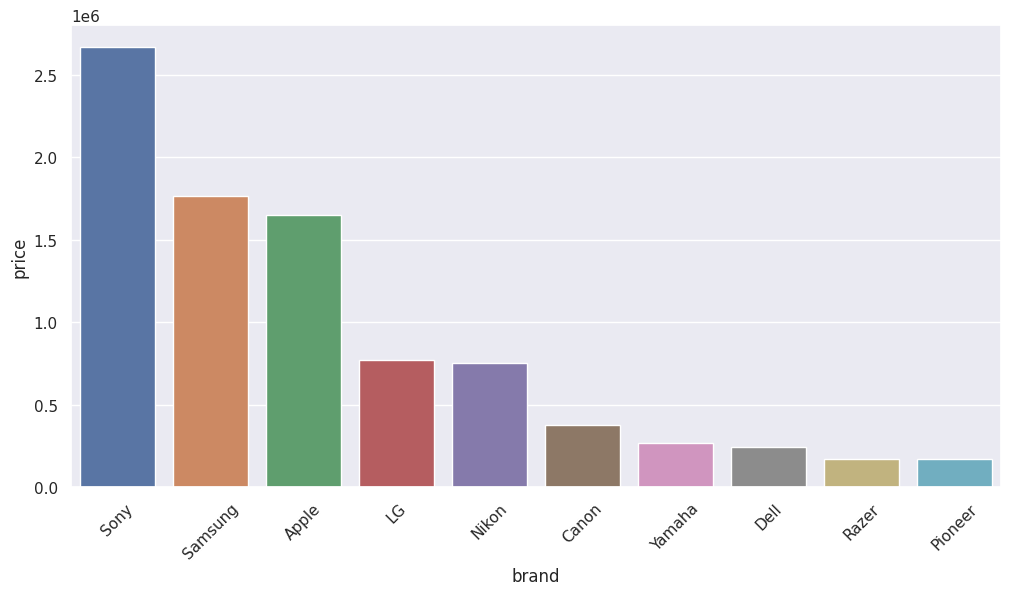

In [35]:
by_brand = df2[['price', 'brand']].groupby('brand').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_brand.head(10), x='brand', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

### Produto que mais vende ($)


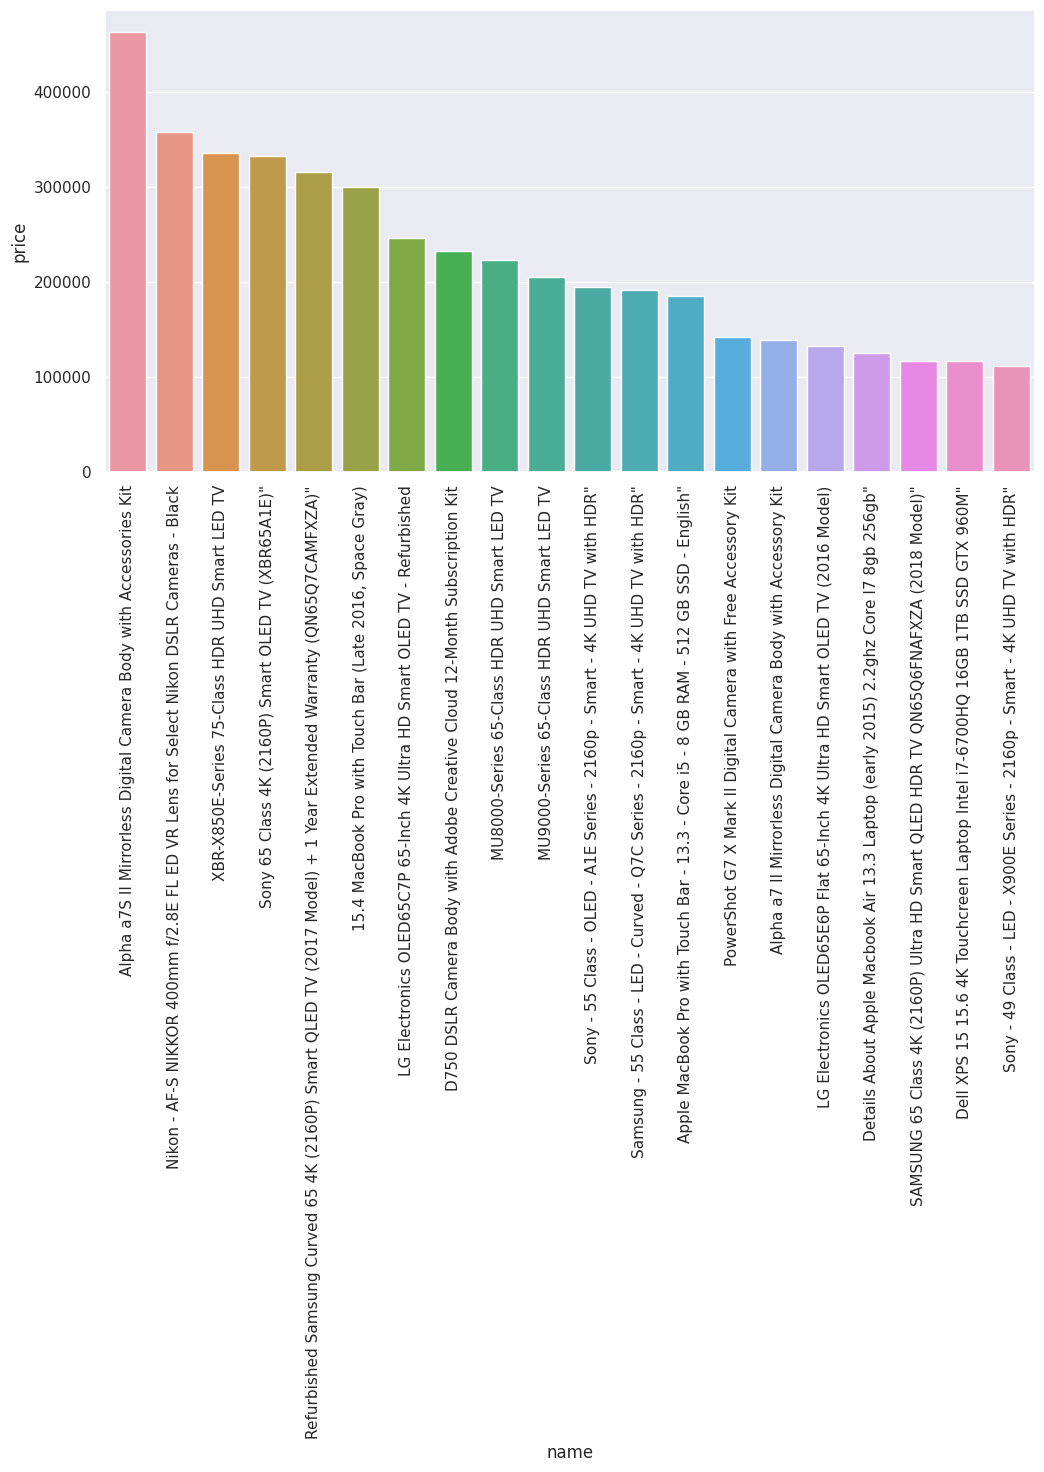

In [36]:
by_product = df2[['price', 'name']].groupby('name').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_product.head(20), x='name', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

### Produto que mais vende (quantidade)

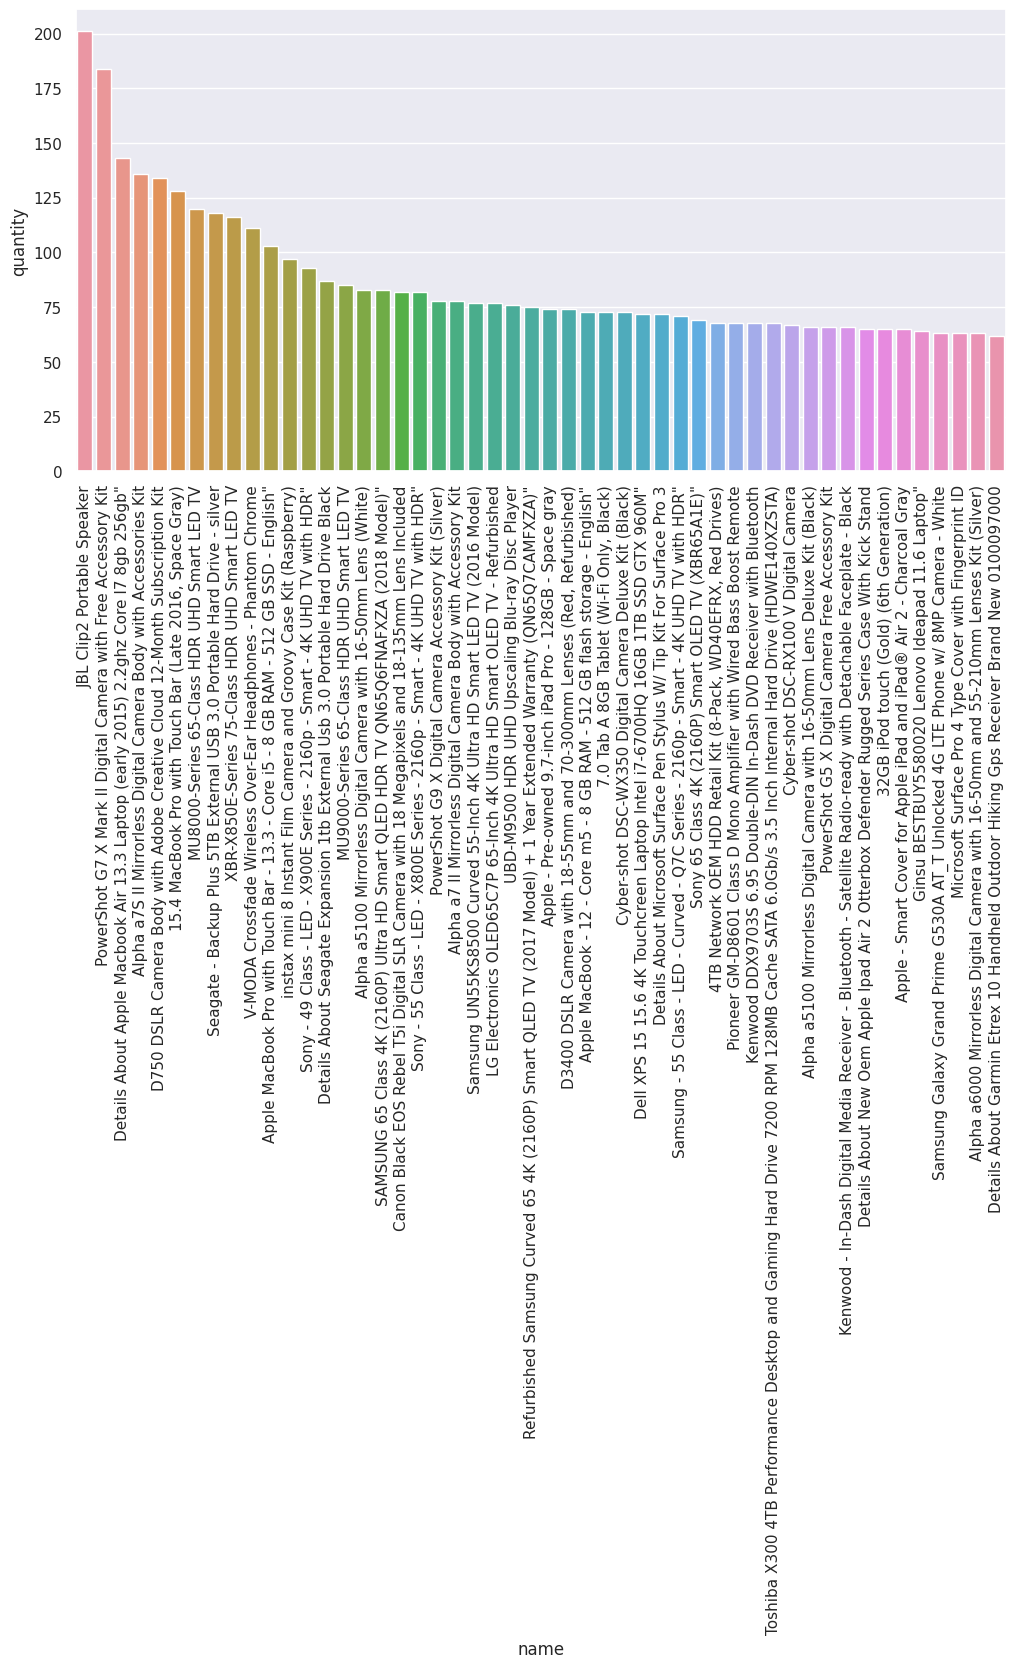

In [44]:
by_product_qnt = df2.groupby('name').size().reset_index(name='quantity')
by_product_qnt = by_product_qnt.sort_values('quantity', ascending=False).head(50)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_product_qnt, x='name', y='quantity', ax=ax)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

### "day_n" que mais vende


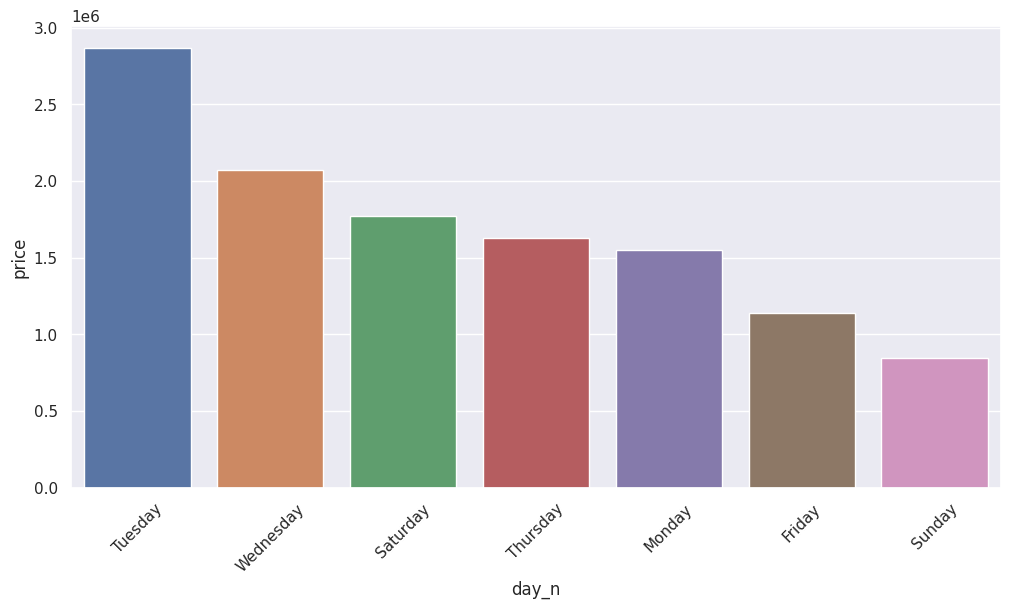

In [15]:
by_day_n = df2[['price', 'day_n']].groupby('day_n').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_day_n, x='day_n', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

### Month que mais vende


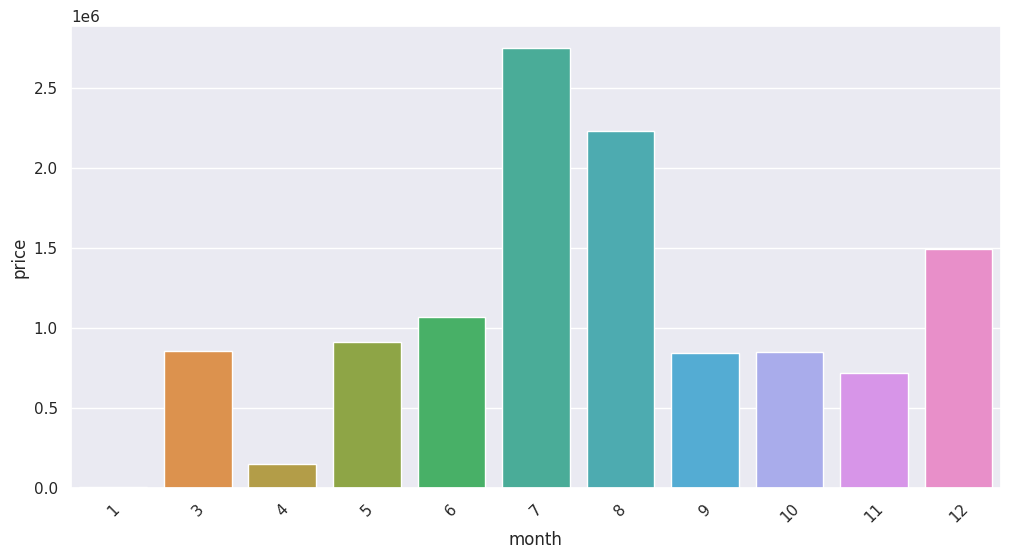

In [21]:
by_month = df2[['price', 'month']].groupby('month').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_month, x='month', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

### Week que mais vende


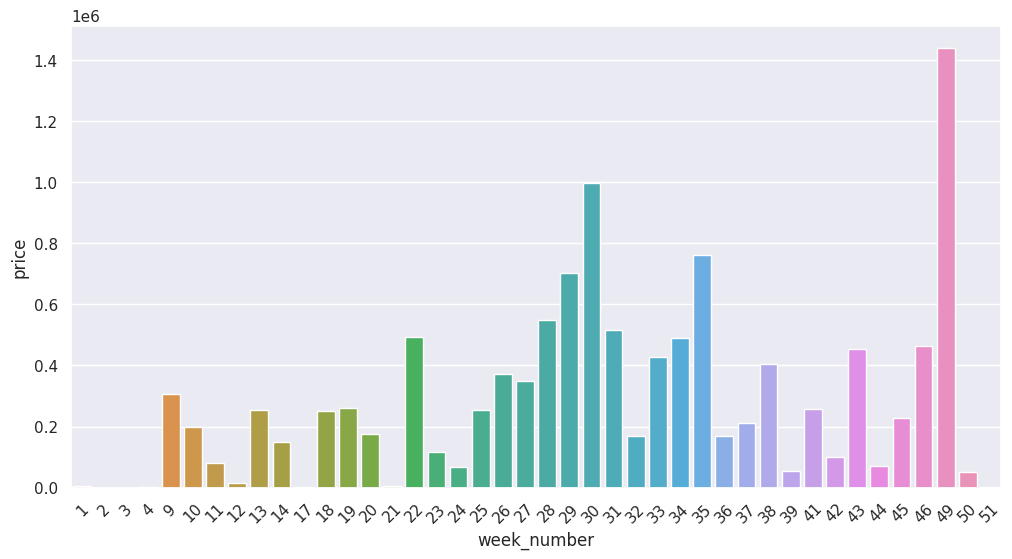

In [24]:
by_week_number = df2[['price', 'week_number']].groupby('week_number').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_week_number, x='week_number', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

### Dia do mes que mais vende

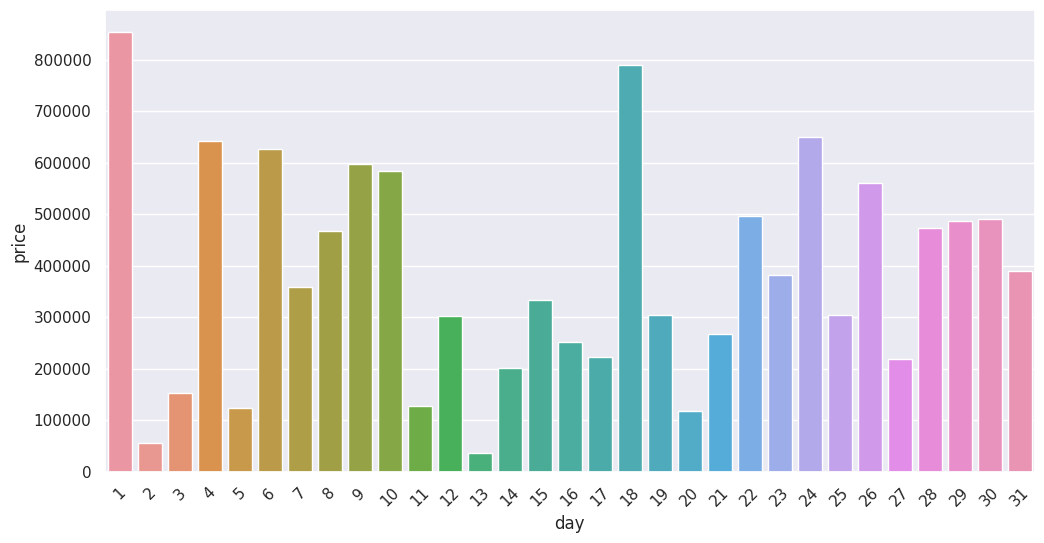

In [26]:
by_day = df2[['price', 'day']].groupby('day').sum().sort_values('price', ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=by_day, x='day', y='price', ax=ax)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

## 6.0 Data preparation

### Rescaling

### Encoding

### Transformation

## 7.0 Feature Selection

### Split train and test set

### Boruta as Feature Selector

## 8.0 Machine Learning Modeling

### Average Model

### Linear Regression

### Lasso

### Random Forest

### XGBoost

### Compare the models perfomance

### Time Series Cross Validation Manual

### Time Series Cross Validarion Sklearn

## 9.0 Fine Tunnig

### Random Search

### Bayesian Search

### Final Model

## 10.0 Tradução e Interpretação do Erro

### Business Performance

### Total Performance

### Machine Learning Performance

## 11.0 Deploy the model

### Rosmann Class

### API Handler

### API Tester